#  Cleaning Data

## 1. Data in Python Request

\* Read in data from the Excel spreadshee(heart.csv) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [45]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [46]:
# check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [47]:
# see the rows with missing data
df[df.isna().any(axis=1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [48]:
# check the numerical columns
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [49]:
# check the categorical columms
df.Sex.value_counts()

,count
Sex,
M,725
F,193


In [50]:
# check the categorical columms
df.RestingECG.value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [51]:
# check the categorical columms
df.ST_Slope.value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [52]:
# check for duplicate values
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [53]:
# drop duplicates
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [54]:
# alternative: save non-duplicates
df = df[~df.duplicated()]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 5. Outliers Check

* Find any outliers
* Deal with the outliers

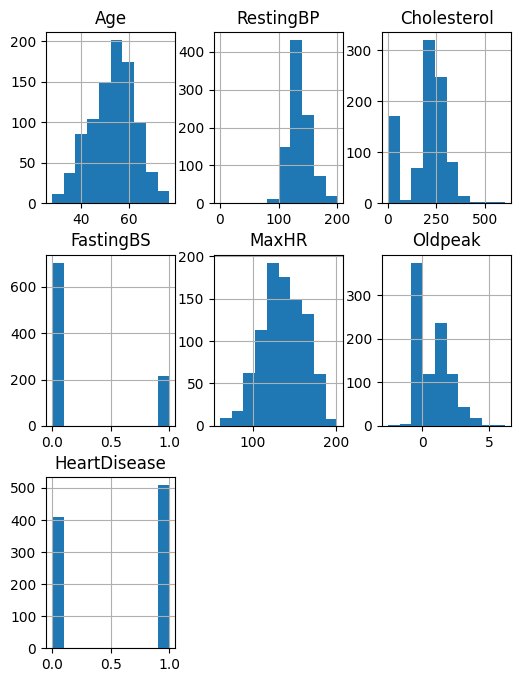

In [55]:
# look at the histograms of all numeric columns
df.hist(figsize = (6,8));

In [56]:
# Check the number of rows before removing outliers
print(f"Number of rows before removing outliers: {len(df)}")

# Calculate the 99th percentile of the Cholesterol column
cholesterol_99th_percentile = df['Cholesterol'].quantile(0.99)

# Remove rows where Cholesterol is above the 99th percentile
df_cleaned = df[df['Cholesterol'] <= cholesterol_99th_percentile].copy()

# Check the number of rows after removing outliers
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

# Display the first few rows of the cleaned DataFrame
display(df_cleaned.head())

Number of rows before removing outliers: 918
Number of rows after removing outliers: 908


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [57]:
# check for missing values
df[df.isna().any(axis=1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [58]:
# check for duplicate values
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [59]:
# check for outliers
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [60]:
# first round of data cleaning is complete!
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [61]:
import pandas as pd

# read in data
pens = pd.read_csv('heart.csv')
pens.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [62]:
# check the data types
pens.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [63]:
# create a new column using addition
pens['BP_Cholesterol_Sum'] = pens['RestingBP'] + pens['Cholesterol']
pens.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,BP_Cholesterol_Sum
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,429
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,340
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,413
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,352
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,345


In [64]:
import numpy as np

# create a new column using conditional logic
pens['High_RestingBP'] = np.where(pens['RestingBP'] > 140, 'Yes', 'No')
pens.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,BP_Cholesterol_Sum,High_RestingBP
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,429,No
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,340,Yes
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,413,No
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,352,No
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,345,Yes


## 8. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [65]:
# split a column into multiple columns
# As an example, split the 'ChestPainType' column
chest_pain_types = pens.ChestPainType.str.split('A', expand=True)
display(chest_pain_types.head())

,0,1,2
0,,T,
1,N,P,None
2,,T,
3,,SY,None
4,N,P,None


In [66]:
# put columns back into original dataframe
pens[['ChestPainType_Part1', 'ChestPainType_Part2', 'ChestPainType_Part3']] = chest_pain_types
pens.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,BP_Cholesterol_Sum,High_RestingBP,ChestPainType_Part1,ChestPainType_Part2,ChestPainType_Part3
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,429,No,,T,
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,340,Yes,N,P,None
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,413,No,,T,
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,352,No,,SY,None
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,345,Yes,N,P,None


In [67]:
# find if a field contains particular words
pens['ATA or NAP'] = pens.ChestPainType.str.contains('ATA|NAP', regex=True)
pens.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,BP_Cholesterol_Sum,High_RestingBP,ChestPainType_Part1,ChestPainType_Part2,ChestPainType_Part3,ATA or NAP
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,429,No,,T,,True
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,340,Yes,N,P,None,True
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,413,No,,T,,True
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,352,No,,SY,None,False
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,345,Yes,N,P,None,True
